# Forecast Dividends

## Setup

In [46]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>

In [48]:
# Import libraries
import pandas as pd
import numpy as np

from investing.config.file_paths import input_data, processed_data, financial_statements
from investing.tools.functions import data_loader, sensitivity_plot

# Plottting libraries
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline
%config InlineBackend.figure_format ='retina'

<IPython.core.display.Javascript object>

## Configure

In [49]:
# File names
companies_file = "company_names.csv"
income_file = "IncomeStatement.xlsx"
start_file = "start_data_dividends.csv"

<IPython.core.display.Javascript object>

## Load Data

In [50]:
# Load company names
df_names = pd.read_csv(input_data / companies_file)

<IPython.core.display.Javascript object>

In [51]:
df_dividend = df_names[df_names["type"] == "Dividend"].sort_values("ticker")
df_dividend

,ticker,name,type,currency
0,AAL.L,AngloAmerican,Dividend,GBP
3,ALA.TO,AltaGas,Dividend,CAD
5,AQN,Algonquin,Dividend,USD
6,AY,Atlantica,Dividend,USD
8,BEPC,Brookfield Renewable,Dividend,USD
9,BIPC,Brookfield Infrastructure,Dividend,USD
10,BK,Bank of New York Mellon Corporation,Dividend,USD
11,BLK,BlackRock,Dividend,USD
12,BMO,Bank of Montreal,Dividend,USD
13,BNS,Bank of Nova Scotia,Dividend,USD


<IPython.core.display.Javascript object>

## Build Company FCF

In [52]:
company_data = {}
for name in df_dividend["ticker"]:
    company_data[name] = data_loader(
        financial_statements / income_file, name, statement_type="income"
    )

<IPython.core.display.Javascript object>

## FCF Growth

### Growth Forecasts

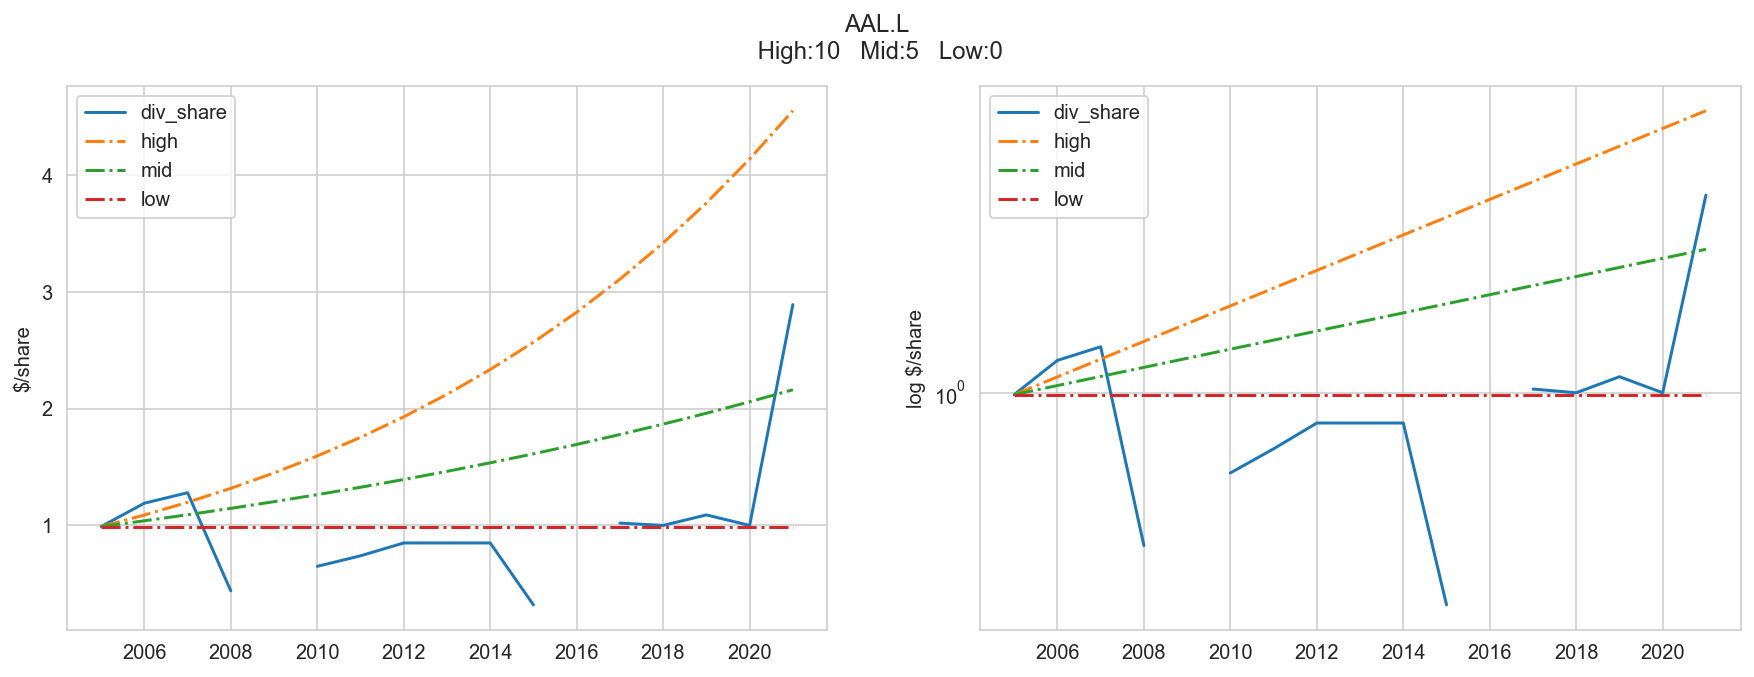

<IPython.core.display.Javascript object>

In [53]:
sensitivity_plot(company_data, "AAL.L", 10, 5, 0, "div")

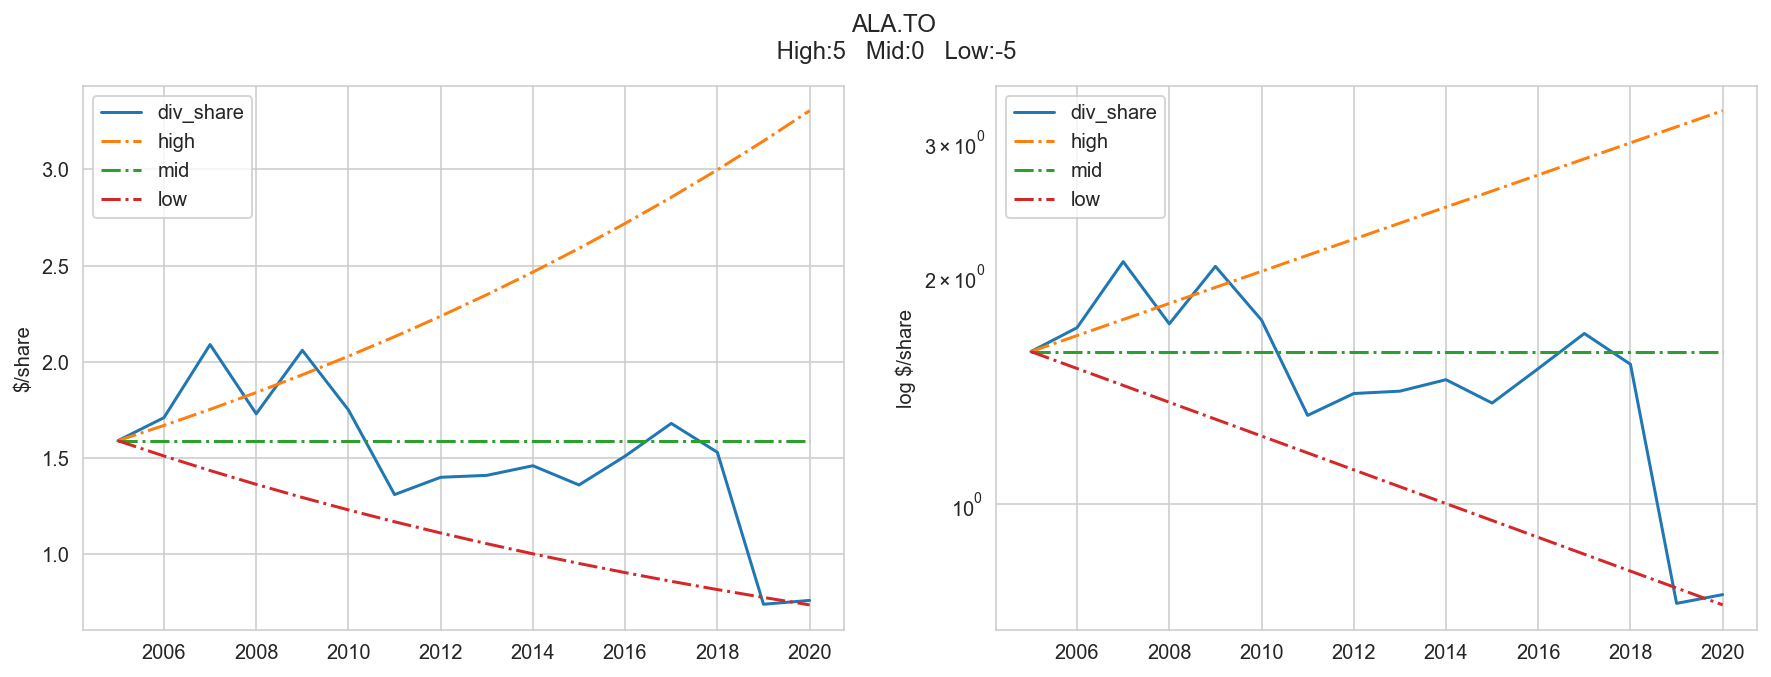

<IPython.core.display.Javascript object>

In [54]:
sensitivity_plot(company_data, "ALA.TO", 5, 0, -5, "div")

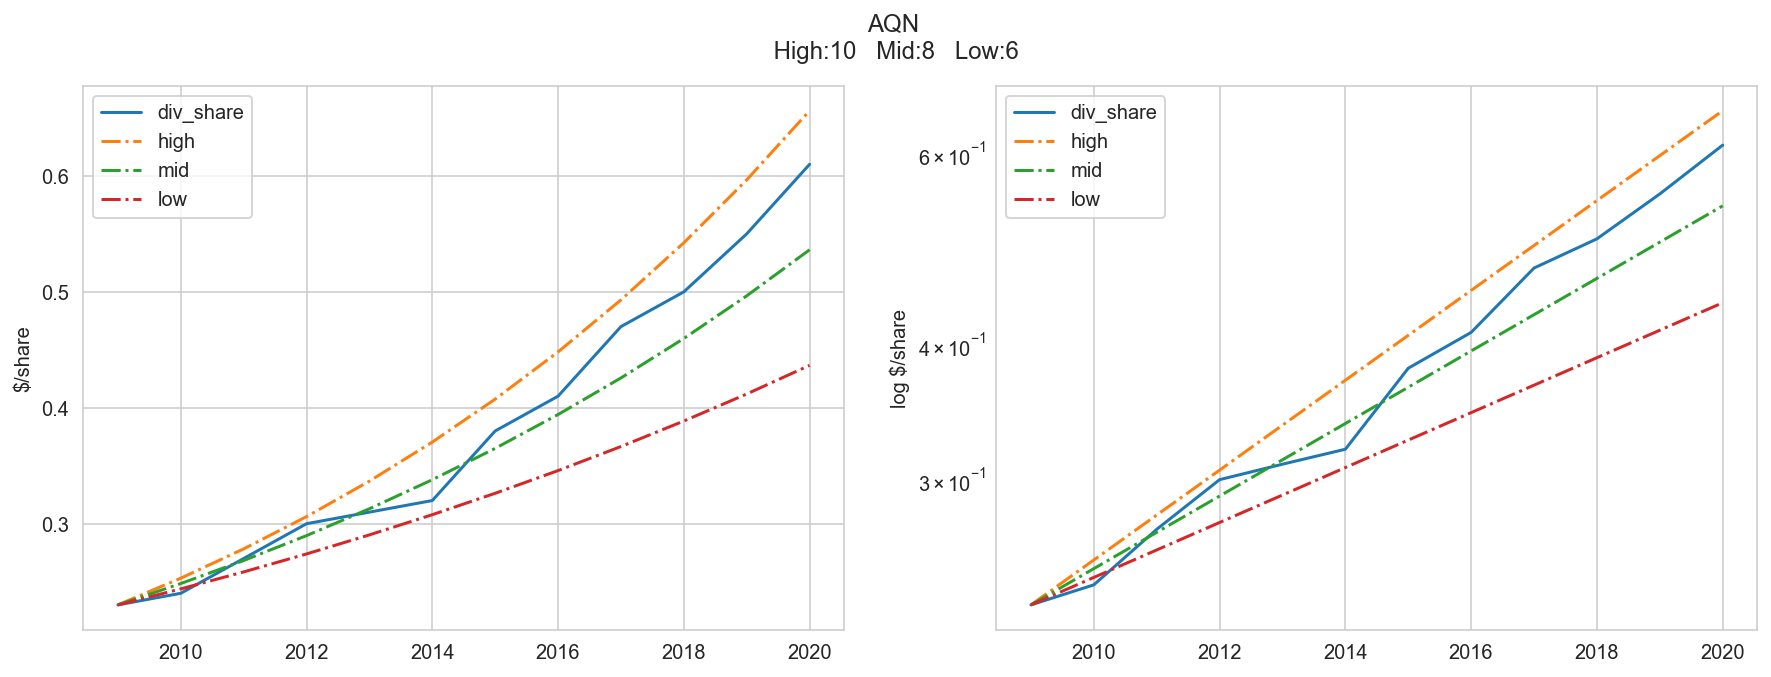

<IPython.core.display.Javascript object>

In [55]:
sensitivity_plot(company_data, "AQN", 10, 8, 6, "div", start_at=2009)

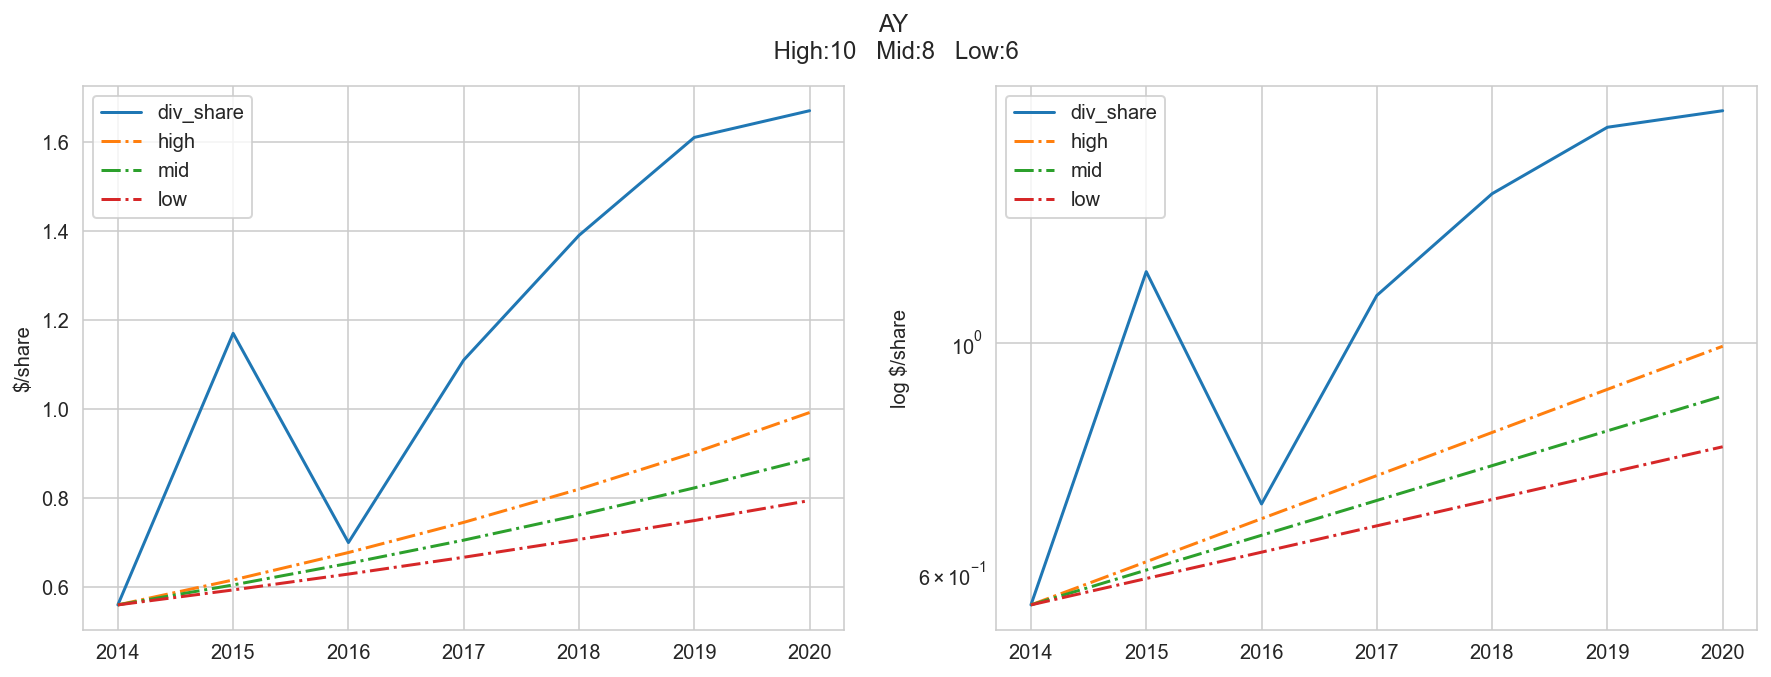

<IPython.core.display.Javascript object>

In [56]:
sensitivity_plot(company_data, "AY", 10, 8, 6, "div")

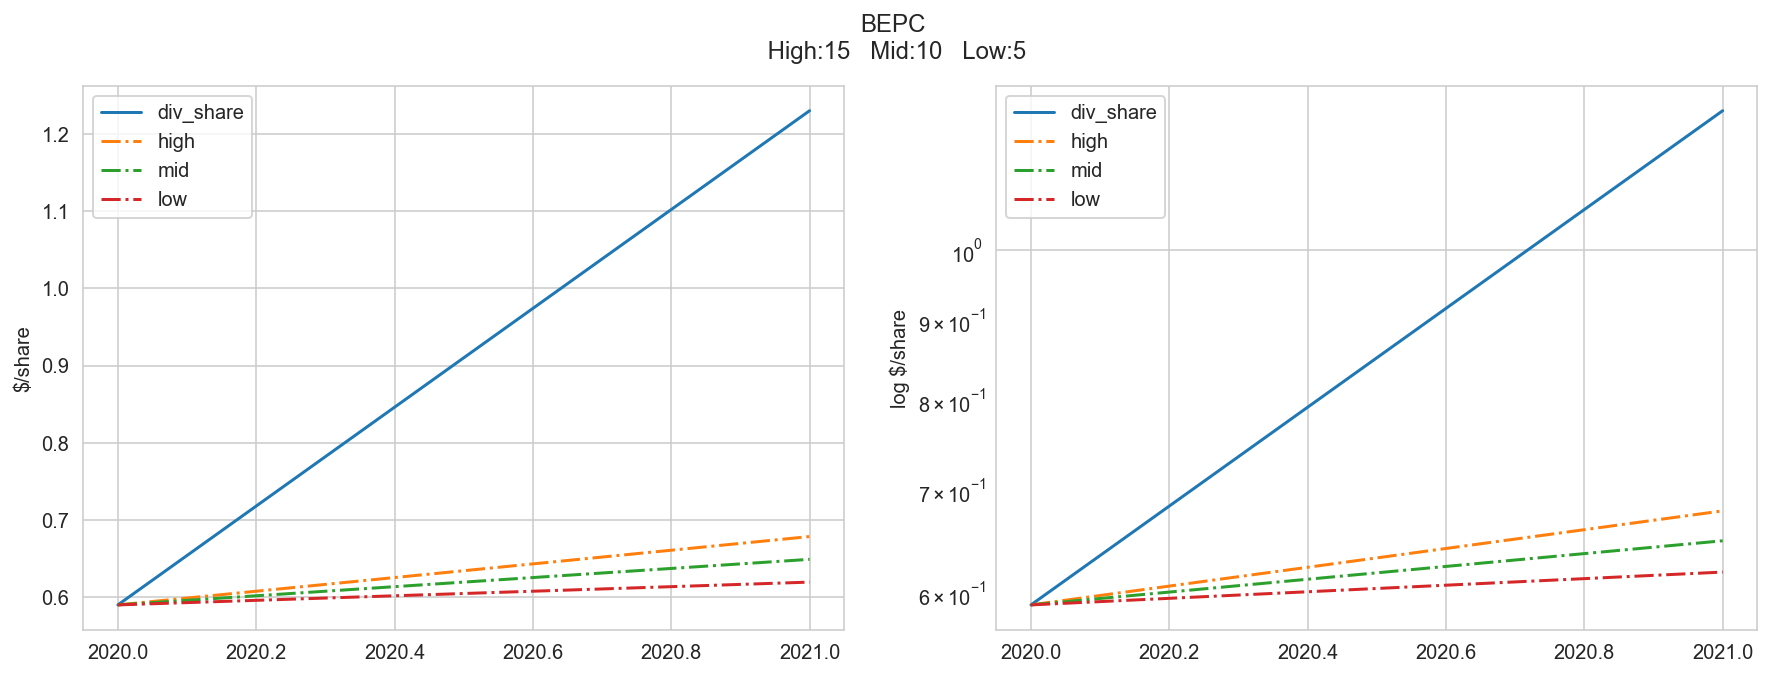

<IPython.core.display.Javascript object>

In [57]:
sensitivity_plot(company_data, "BEPC", 15, 10, 5, "div")

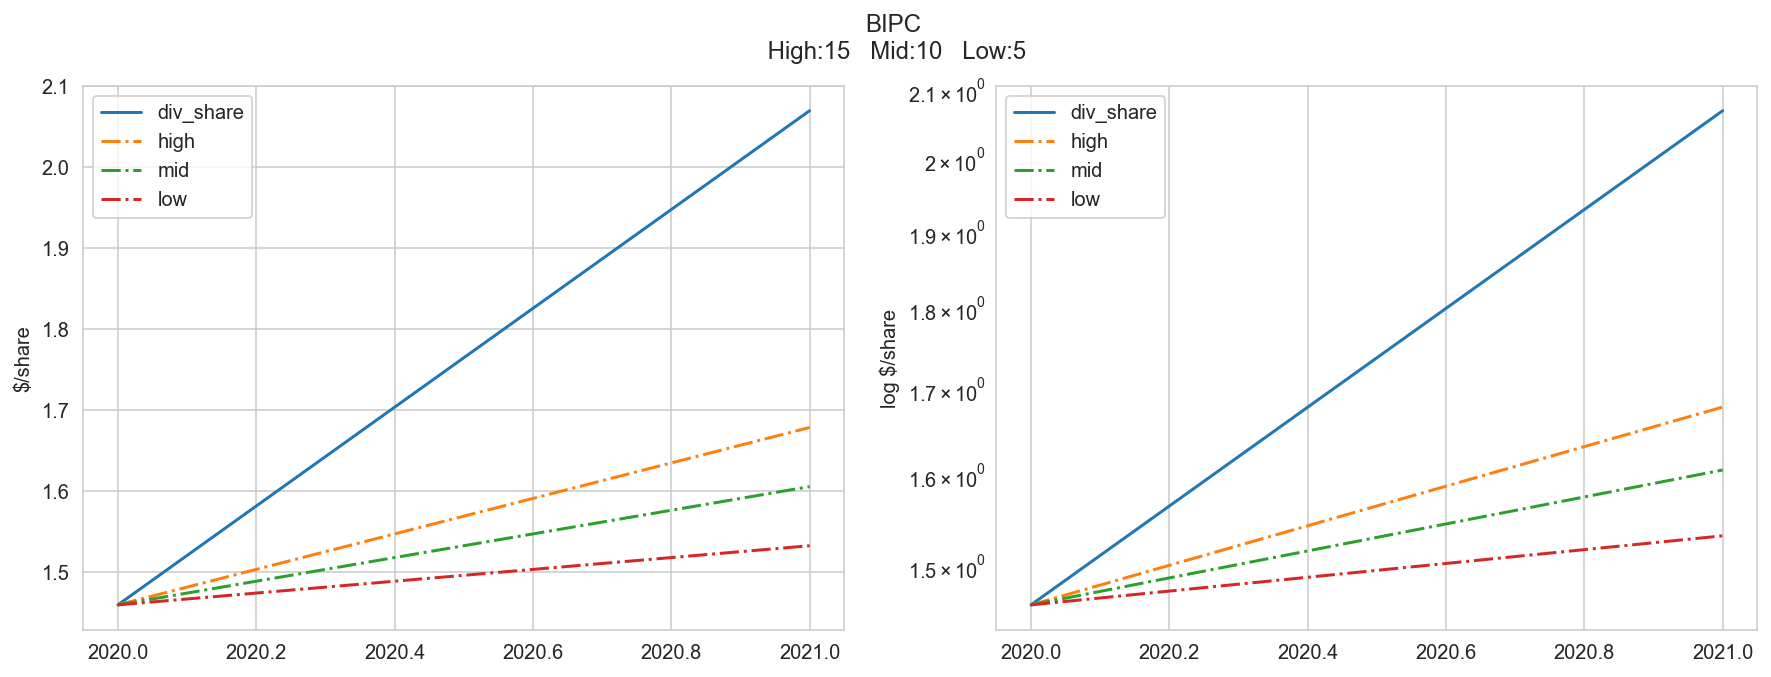

<IPython.core.display.Javascript object>

In [58]:
sensitivity_plot(company_data, "BIPC", 15, 10, 5, "div")

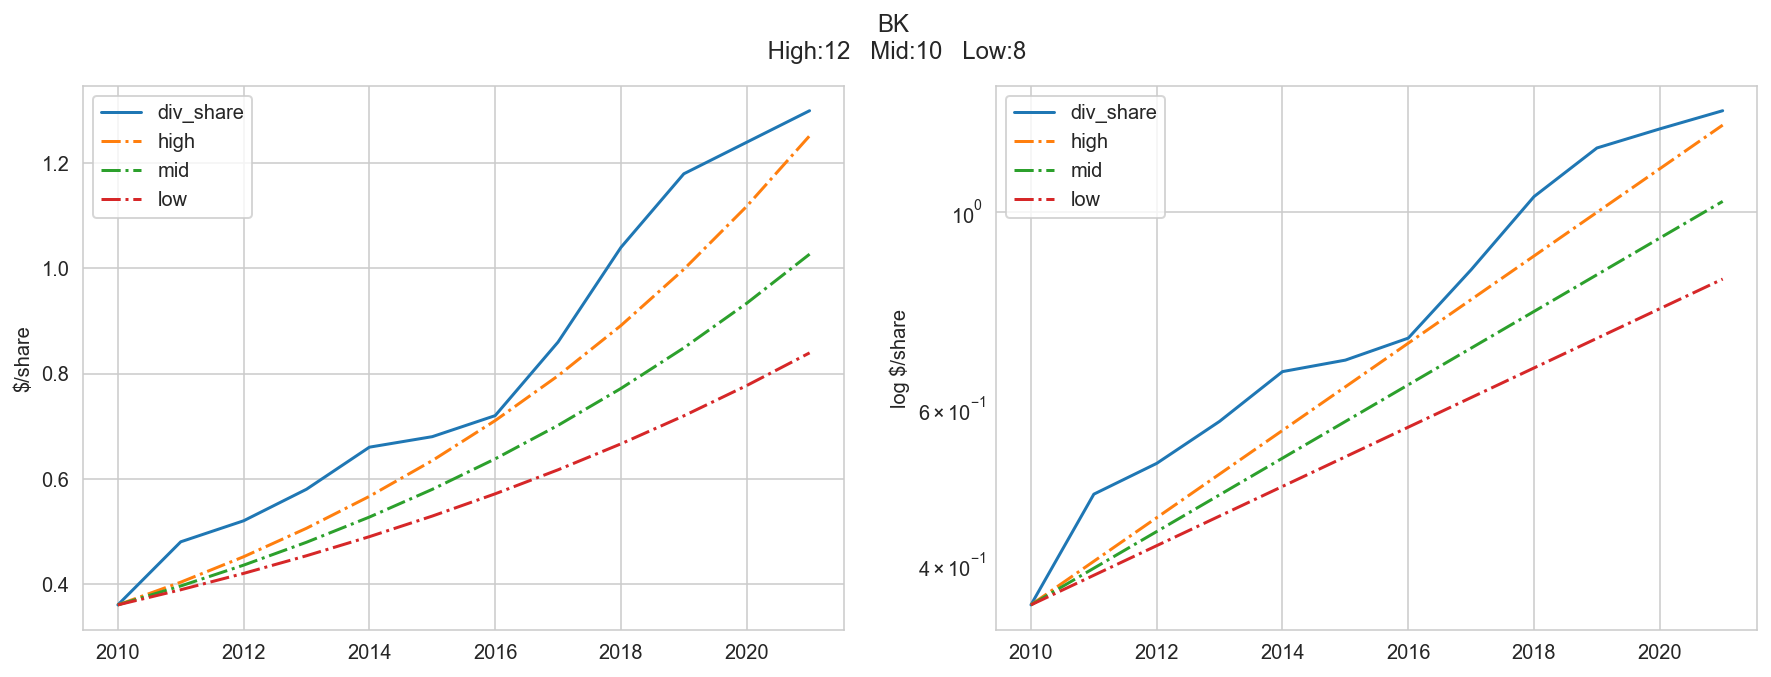

<IPython.core.display.Javascript object>

In [59]:
sensitivity_plot(company_data, "BK", 12, 10, 8, "div", start_at=2010)

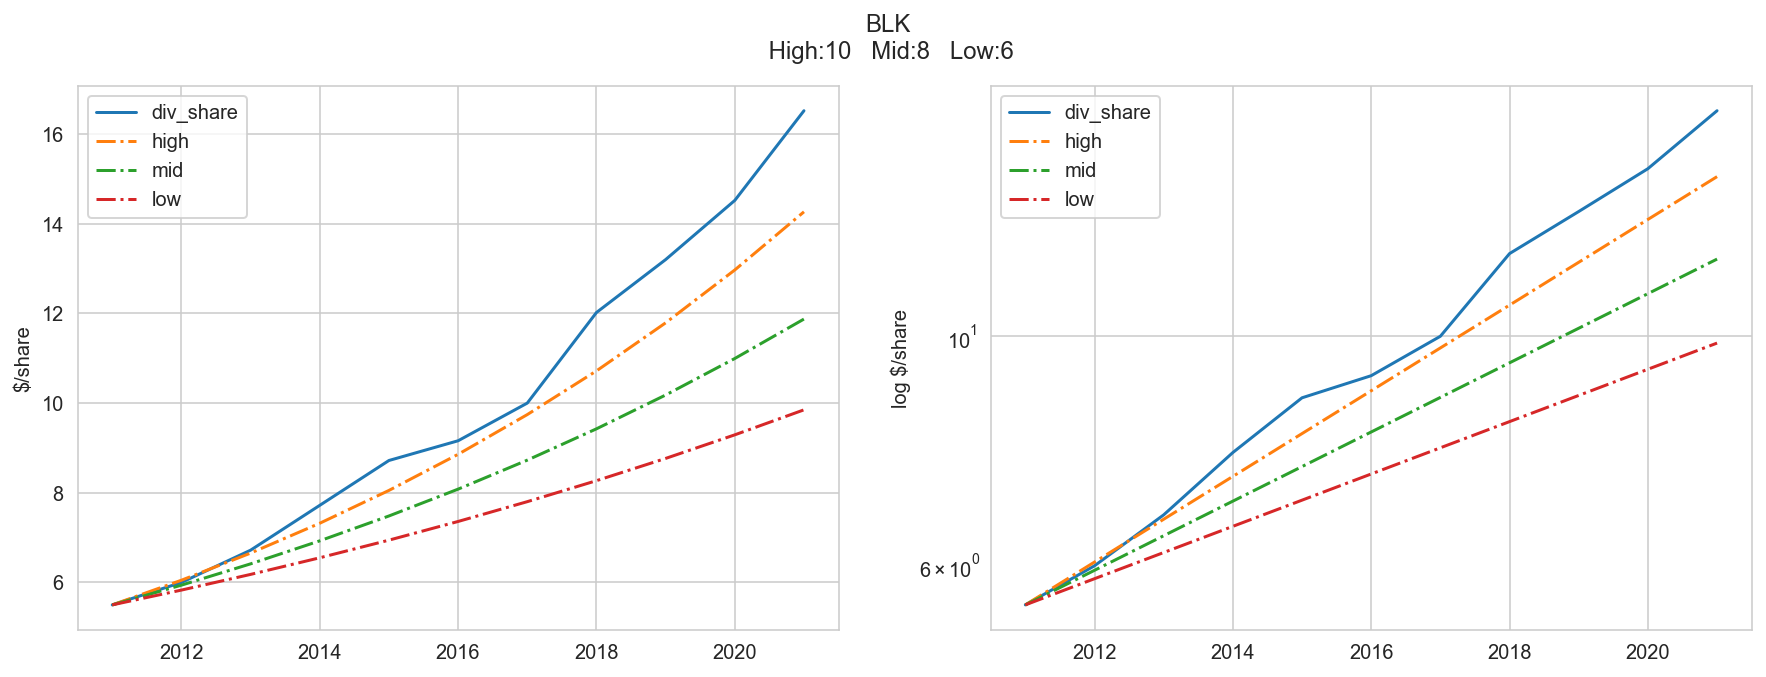

<IPython.core.display.Javascript object>

In [60]:
sensitivity_plot(company_data, "BLK", 10, 8, 6, "div", start_at=2011)

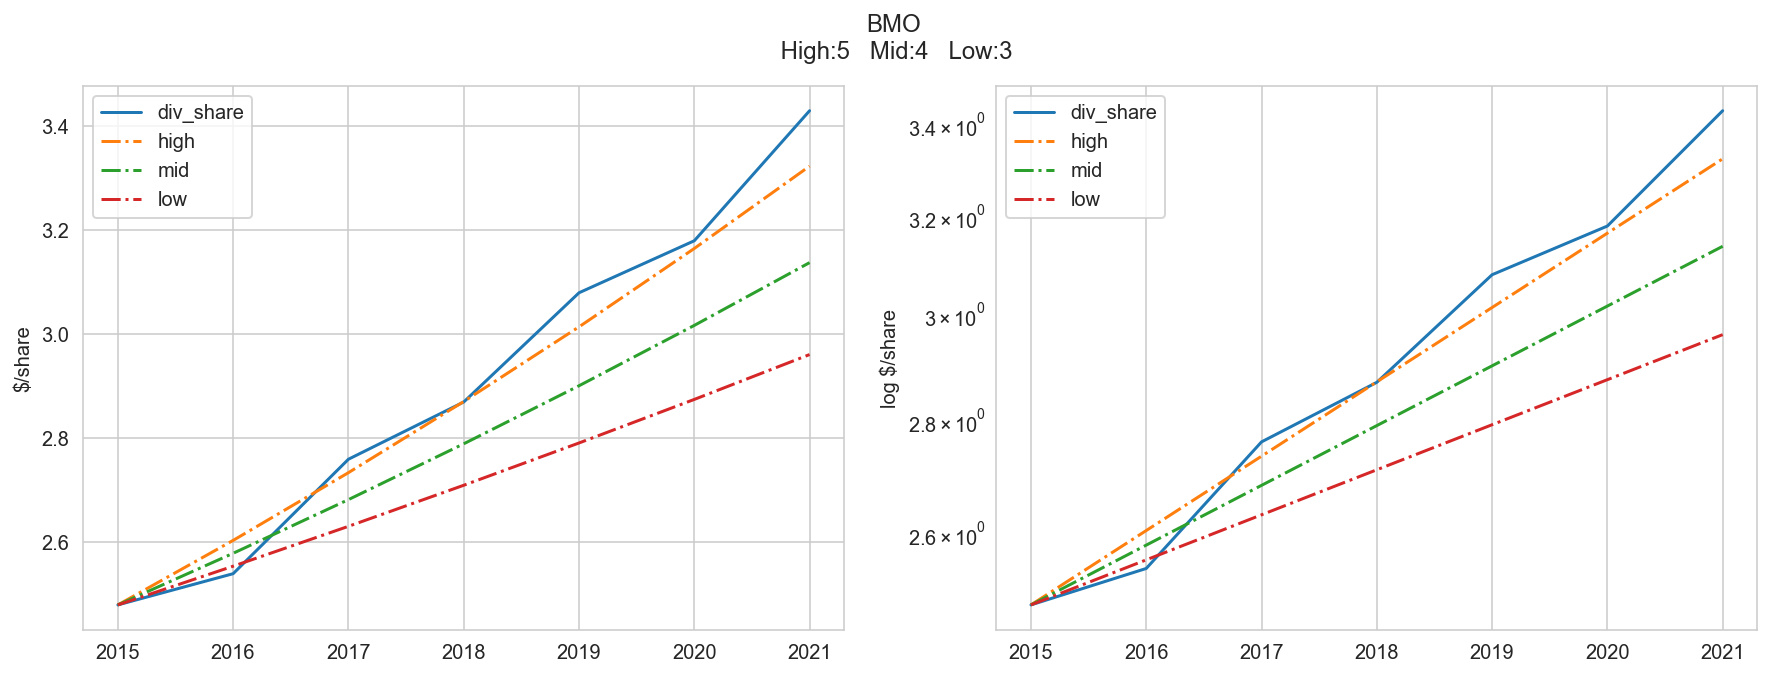

<IPython.core.display.Javascript object>

In [61]:
sensitivity_plot(company_data, "BMO", 5, 4, 3, "div", start_at=2015)

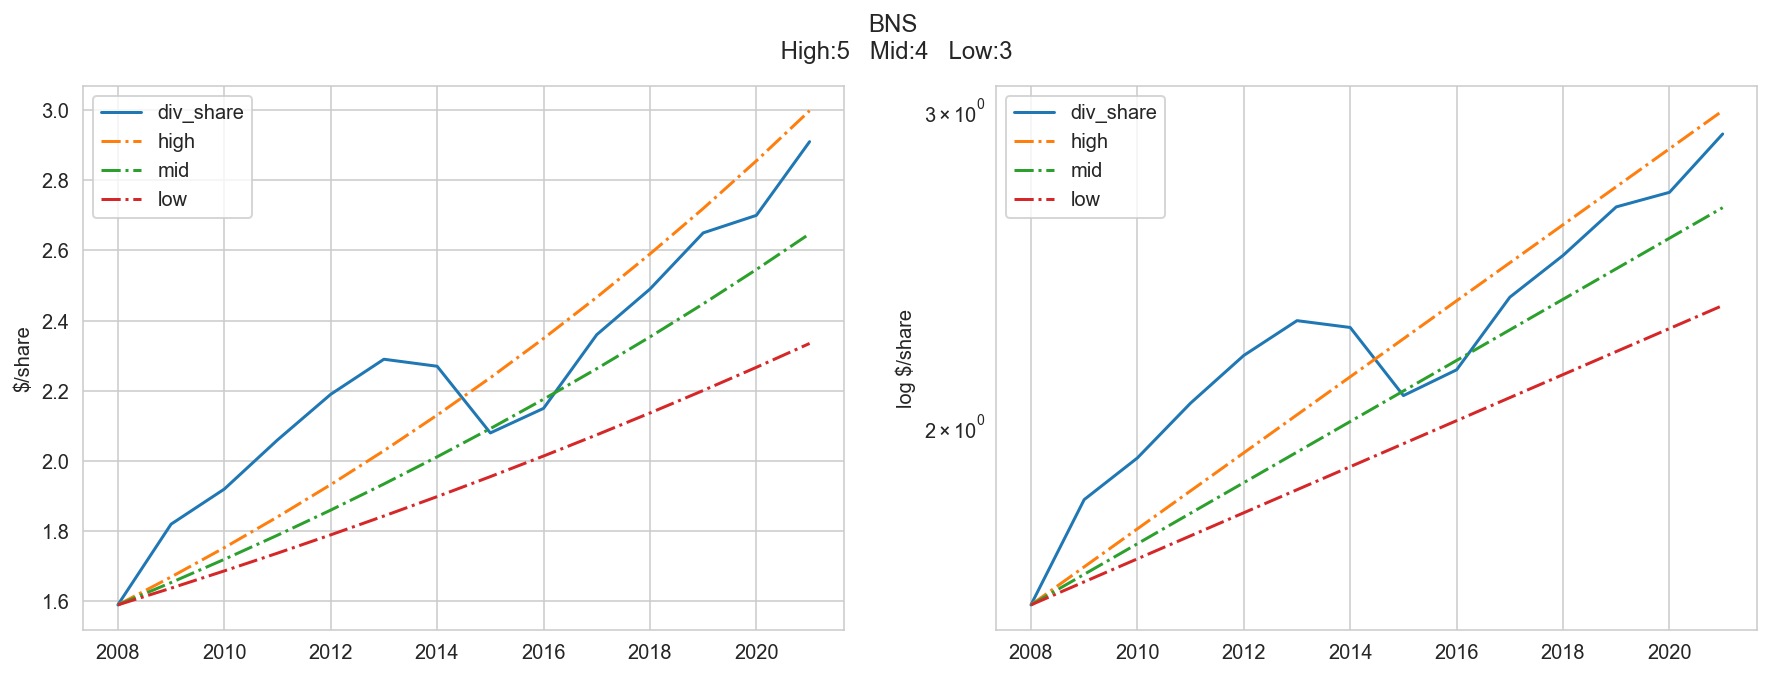

<IPython.core.display.Javascript object>

In [62]:
sensitivity_plot(company_data, "BNS", 5, 4, 3, "div", start_at=2008)

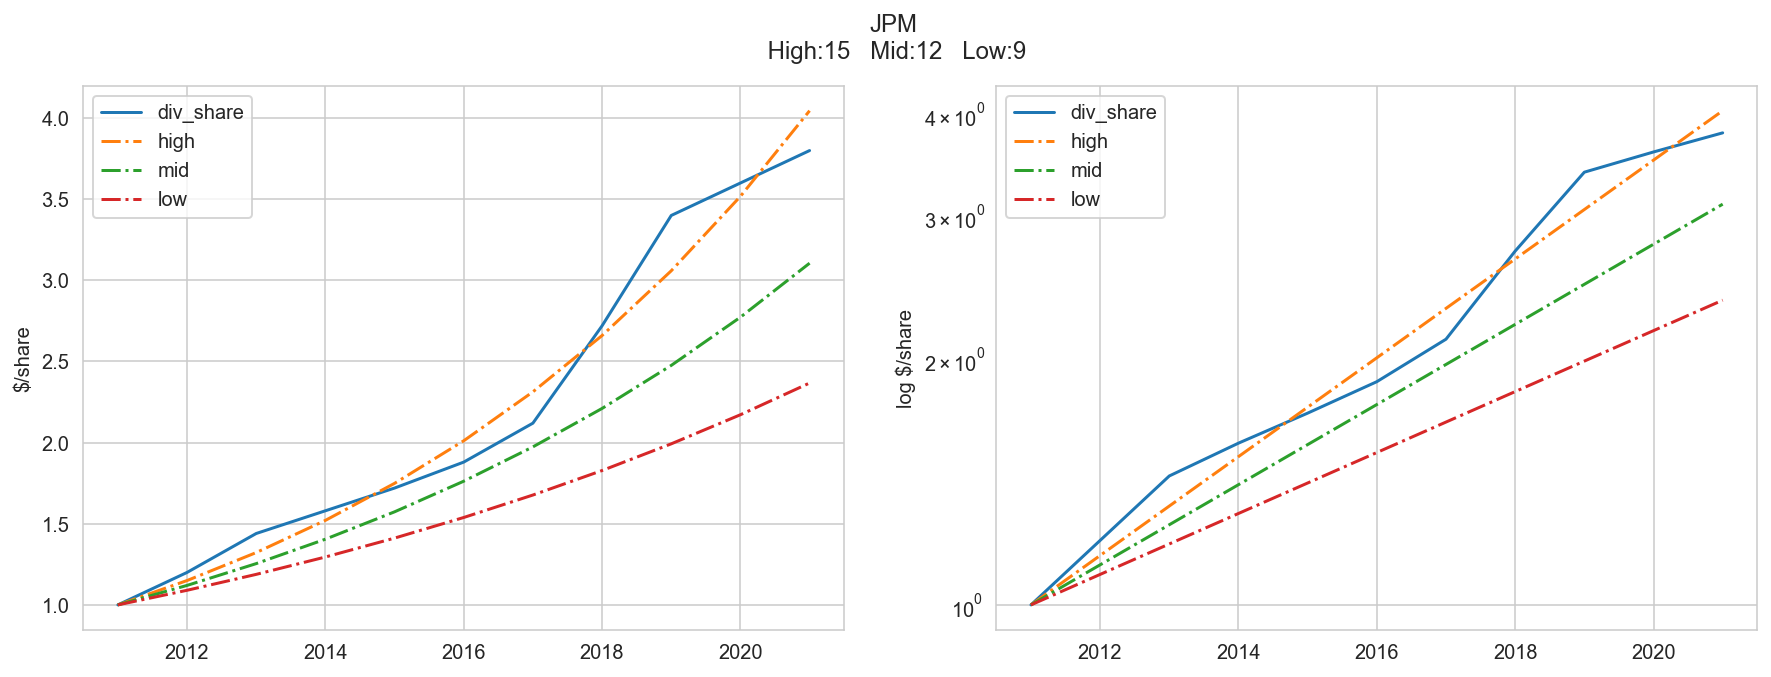

<IPython.core.display.Javascript object>

In [63]:
sensitivity_plot(company_data, "JPM", 15, 12, 9, "div", start_at=2011)

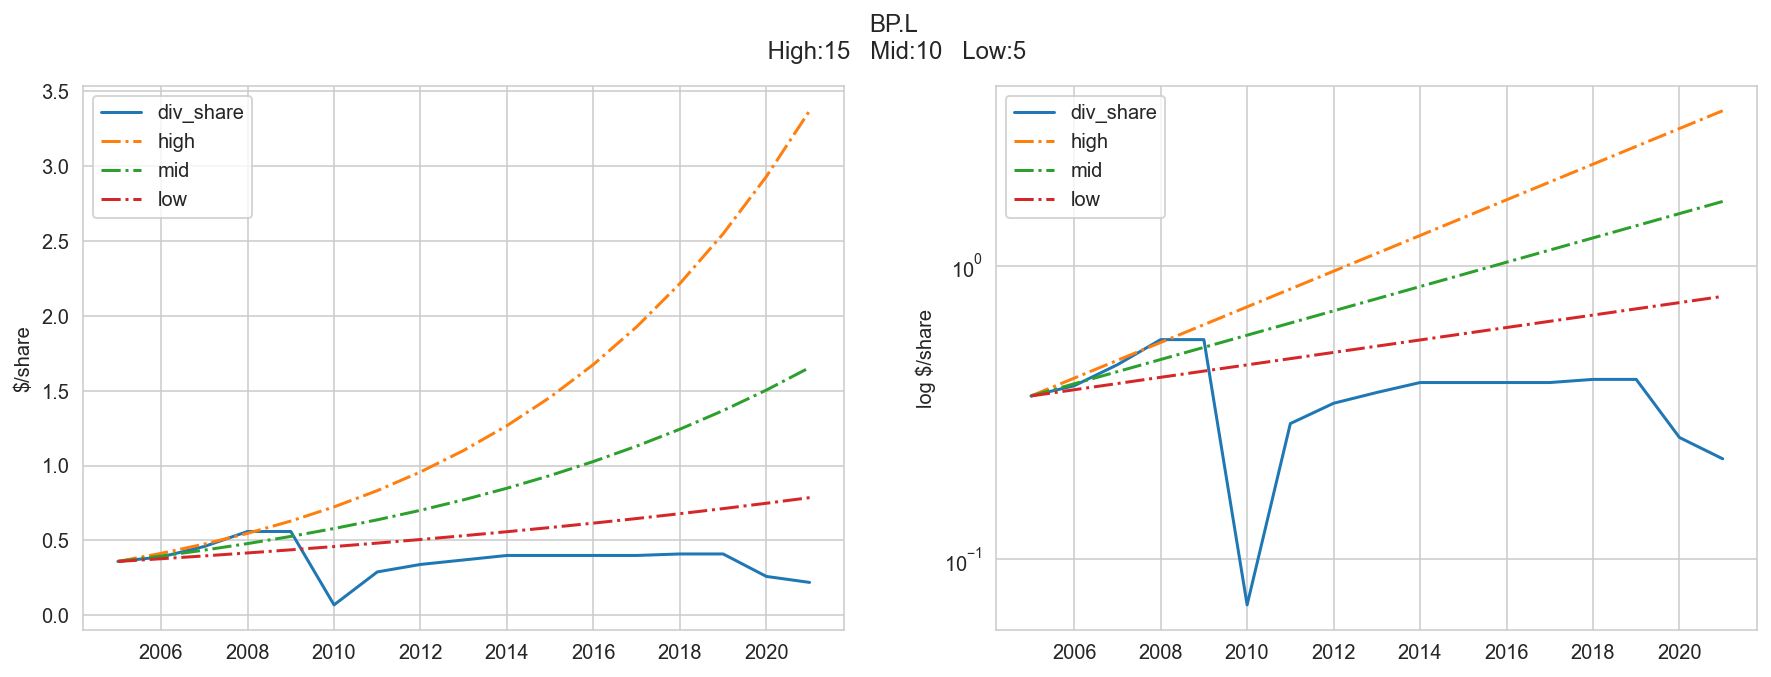

<IPython.core.display.Javascript object>

In [64]:
sensitivity_plot(company_data, "BP.L", 15, 10, 5, "div")

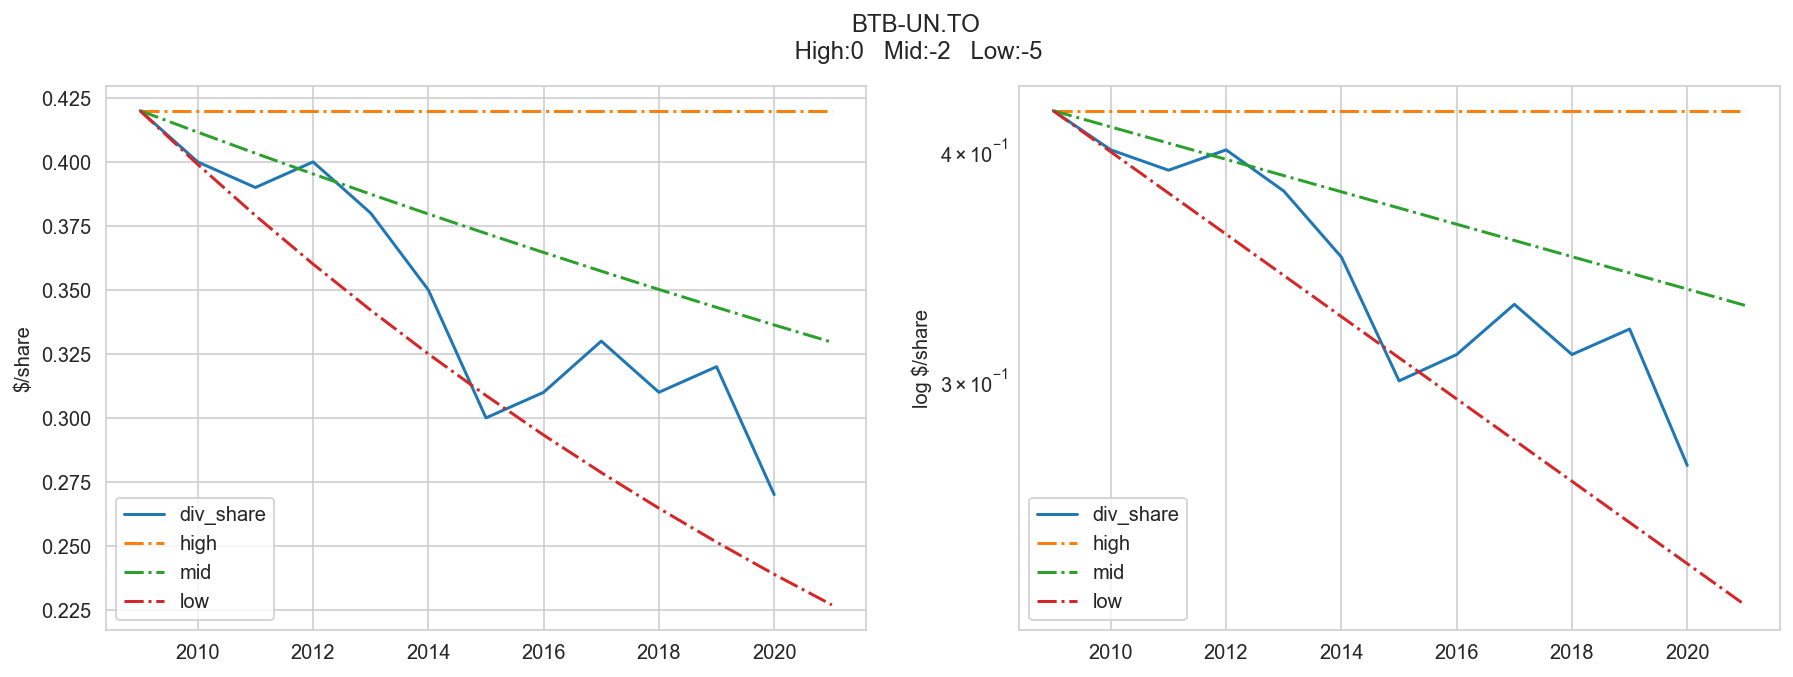

<IPython.core.display.Javascript object>

In [65]:
sensitivity_plot(company_data, "BTB-UN.TO", 0, -2, -5, "div", start_at=2009)

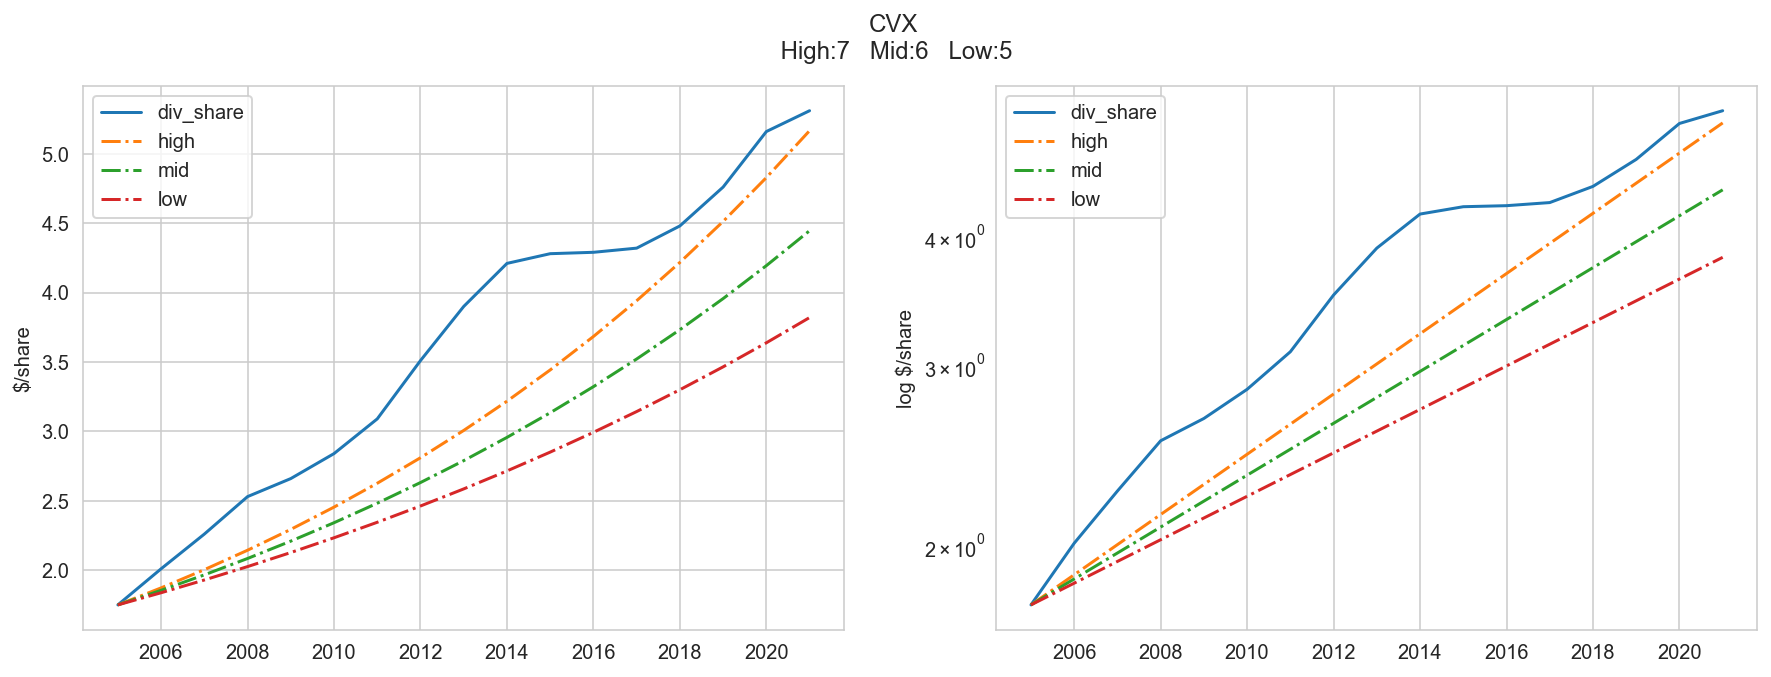

<IPython.core.display.Javascript object>

In [66]:
sensitivity_plot(company_data, "CVX",  7, 6, 5, "div")

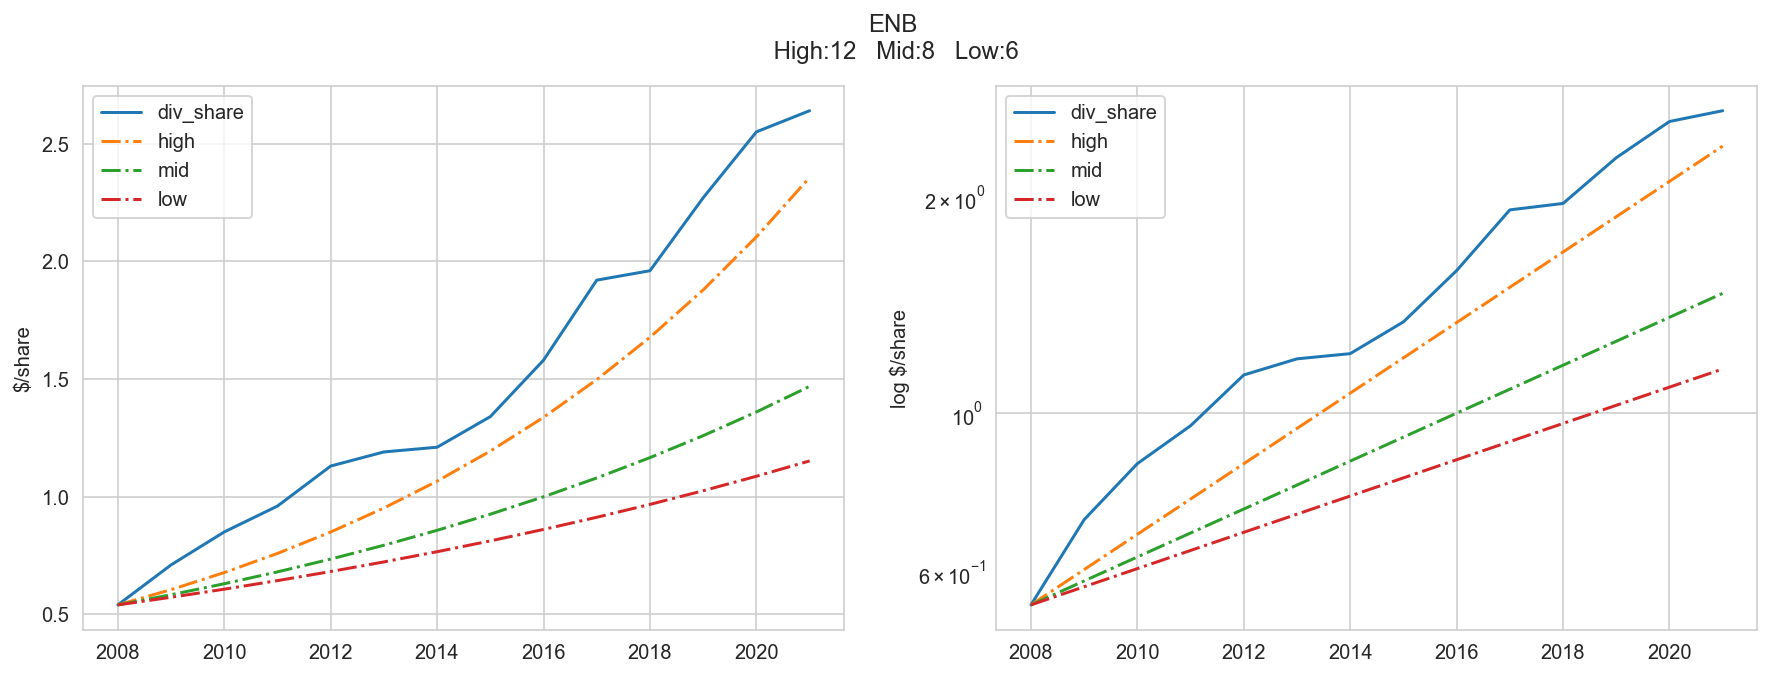

<IPython.core.display.Javascript object>

In [67]:
sensitivity_plot(company_data, "ENB", 12, 8, 6, "div", start_at=2008)

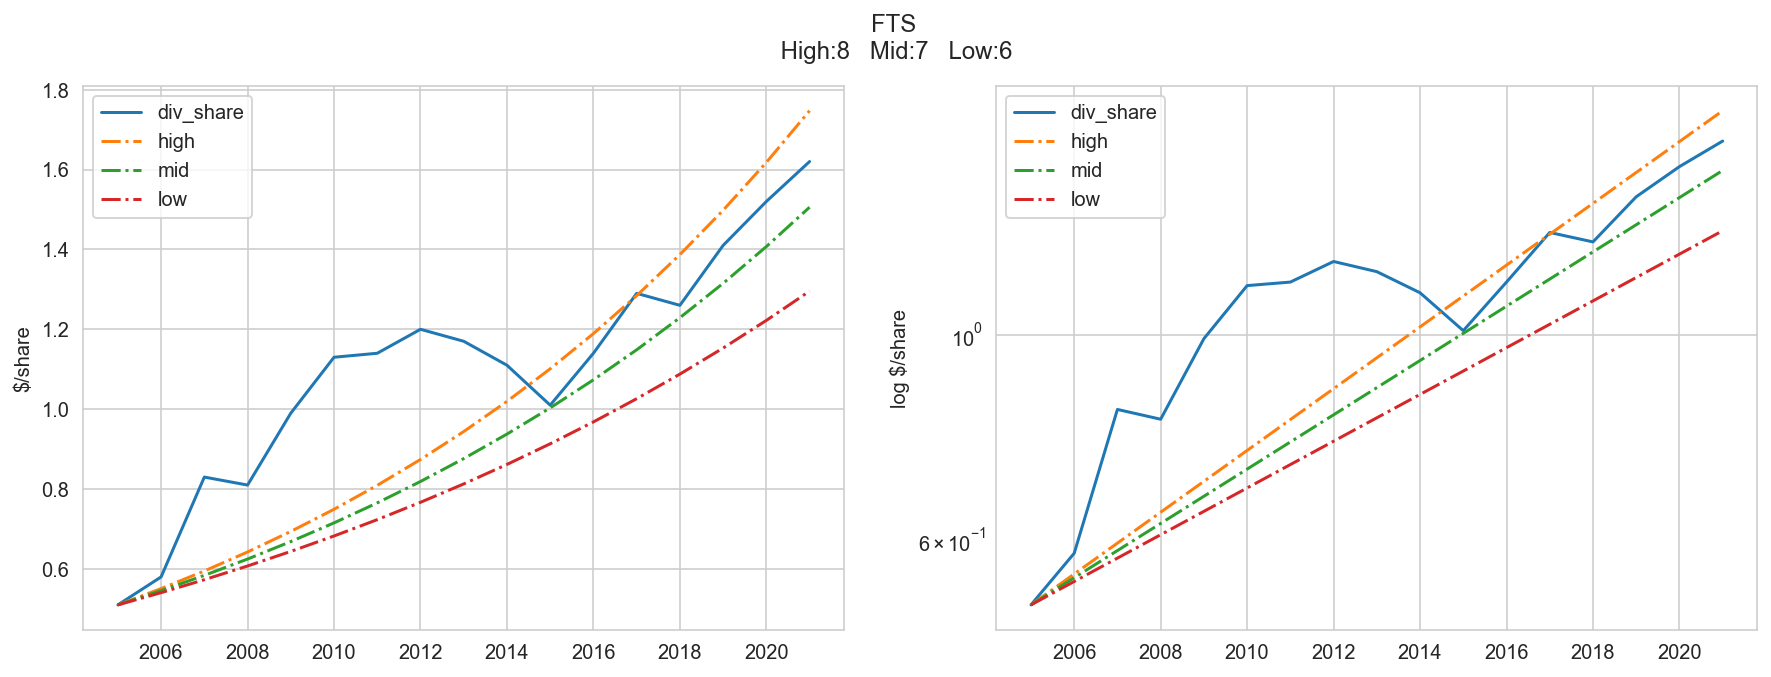

<IPython.core.display.Javascript object>

In [68]:
sensitivity_plot(company_data, "FTS", 8, 7, 6, "div")

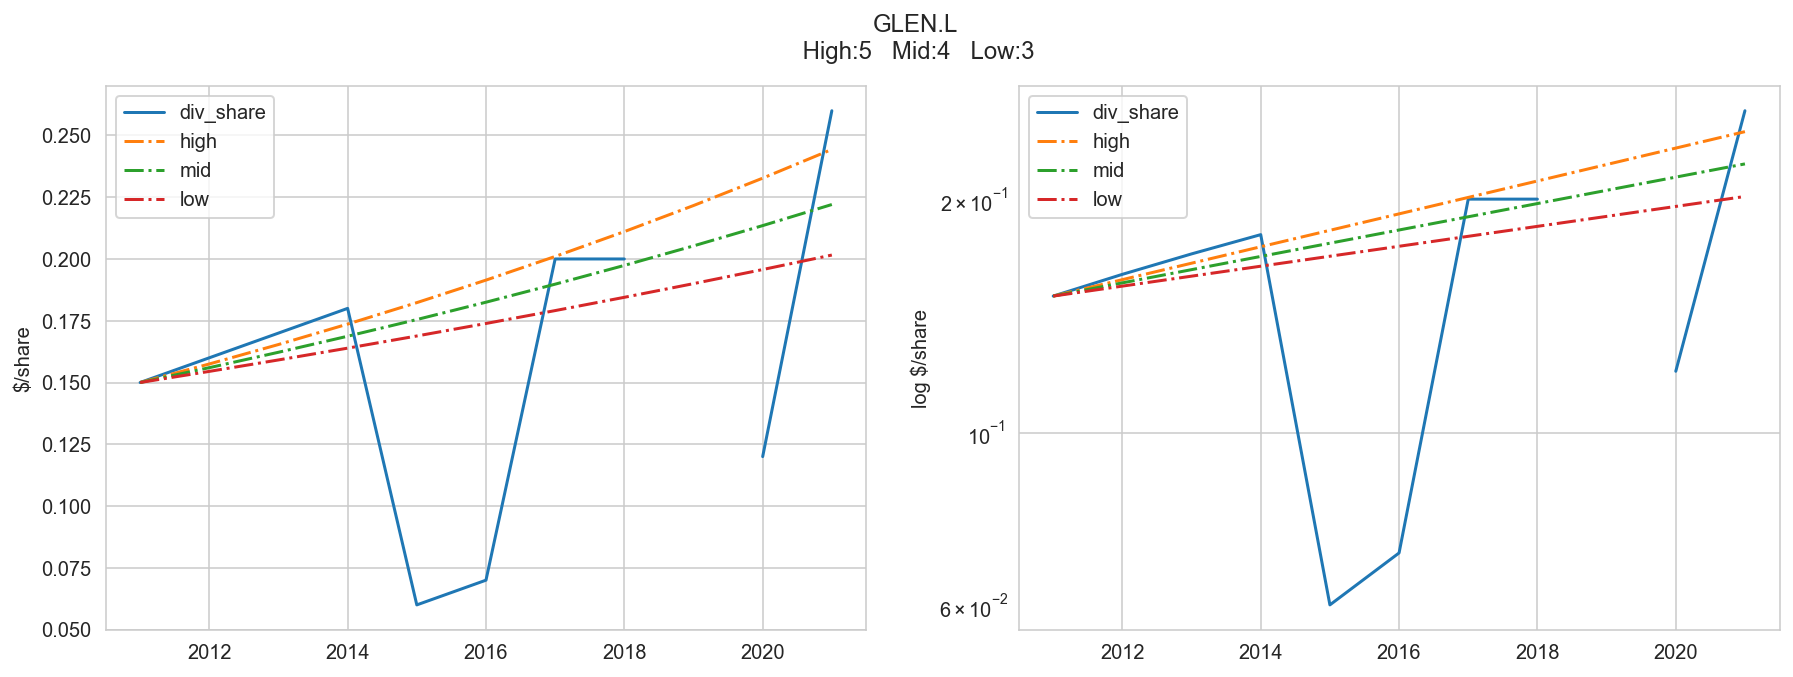

<IPython.core.display.Javascript object>

In [69]:
sensitivity_plot(
    company_data,
    "GLEN.L",
    5,
    4,
    3,
    "div",
    start_at=2011,
)

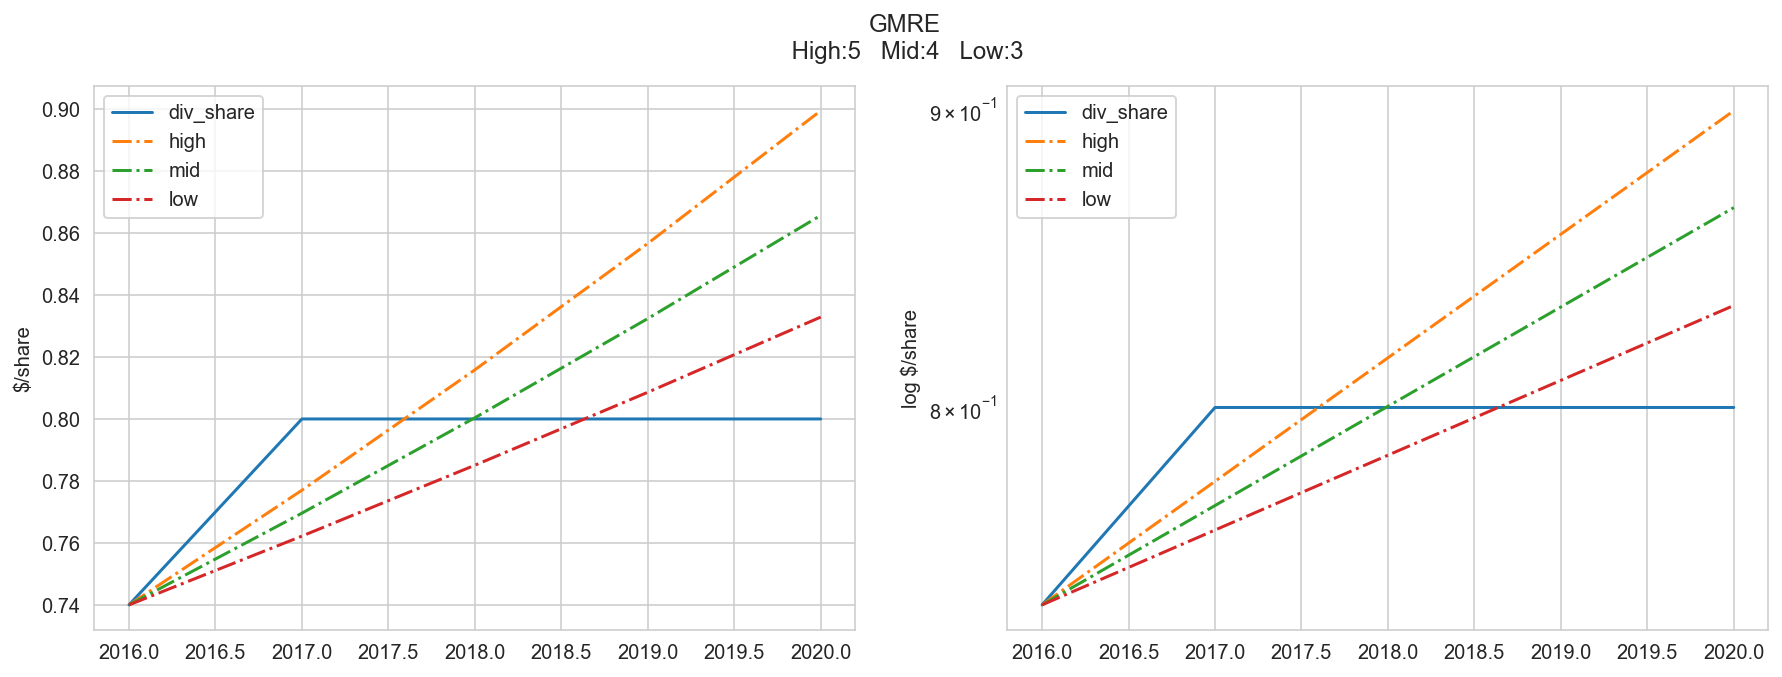

<IPython.core.display.Javascript object>

In [70]:
sensitivity_plot(
    company_data,
    "GMRE",
    5,
    4,
    3,
    "div",
    start_at=2016,
)

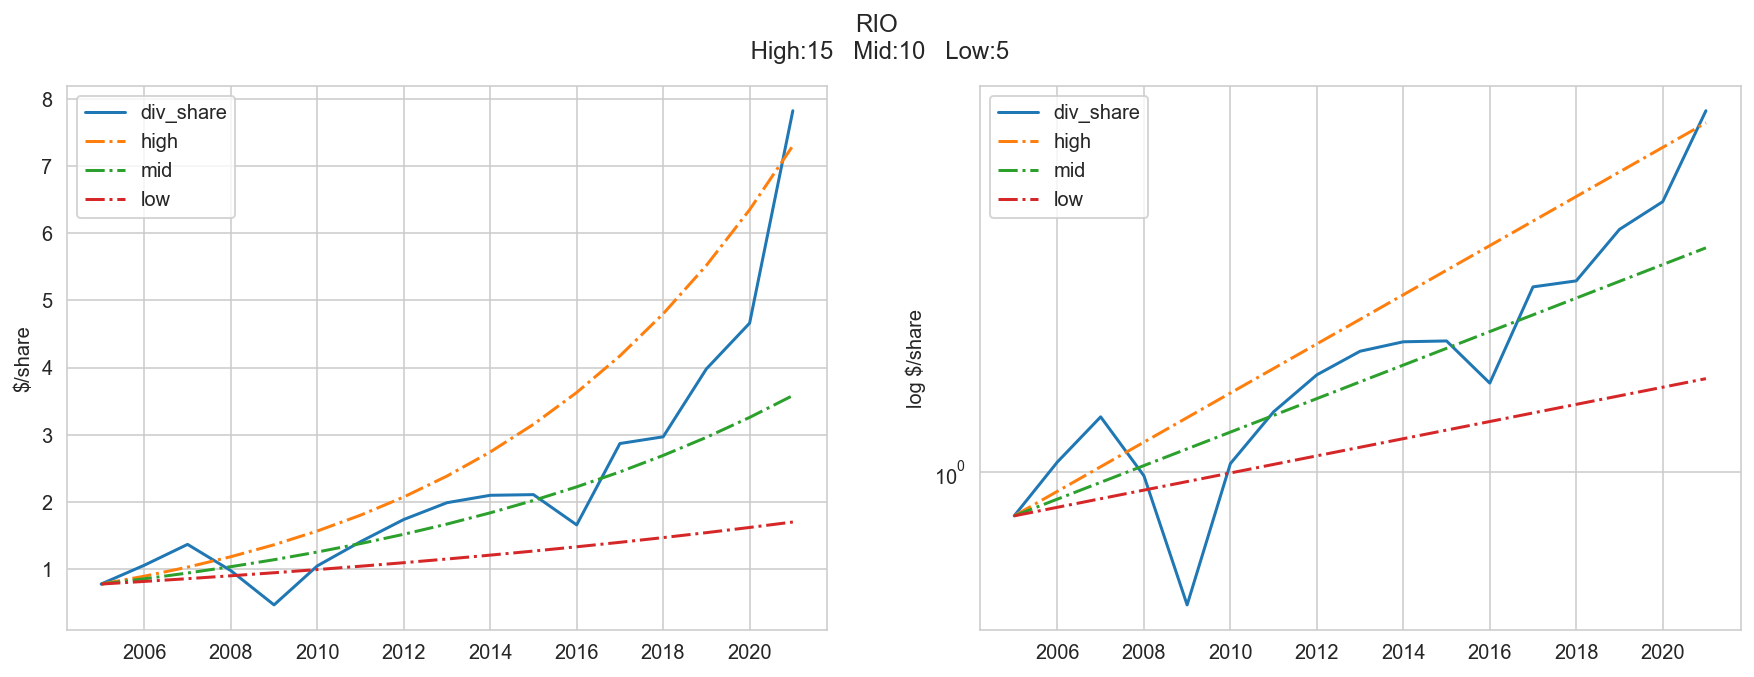

<IPython.core.display.Javascript object>

In [71]:
sensitivity_plot(company_data, "RIO", 15, 10, 5, "div")

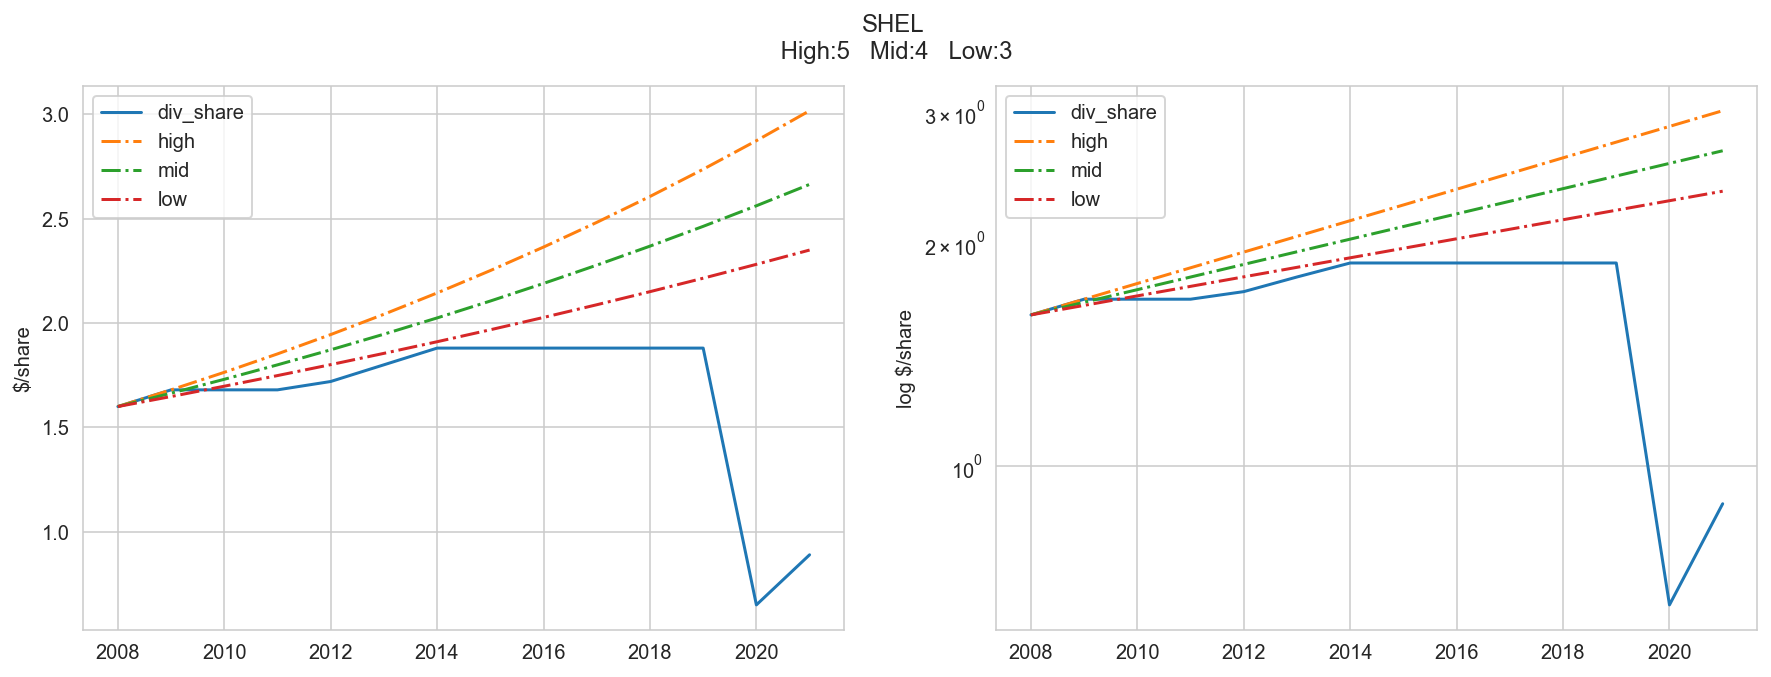

<IPython.core.display.Javascript object>

In [72]:
sensitivity_plot(
    company_data,
    "SHEL",
    5,
    4,
    3,
    "div",
    start_at=2008,
)

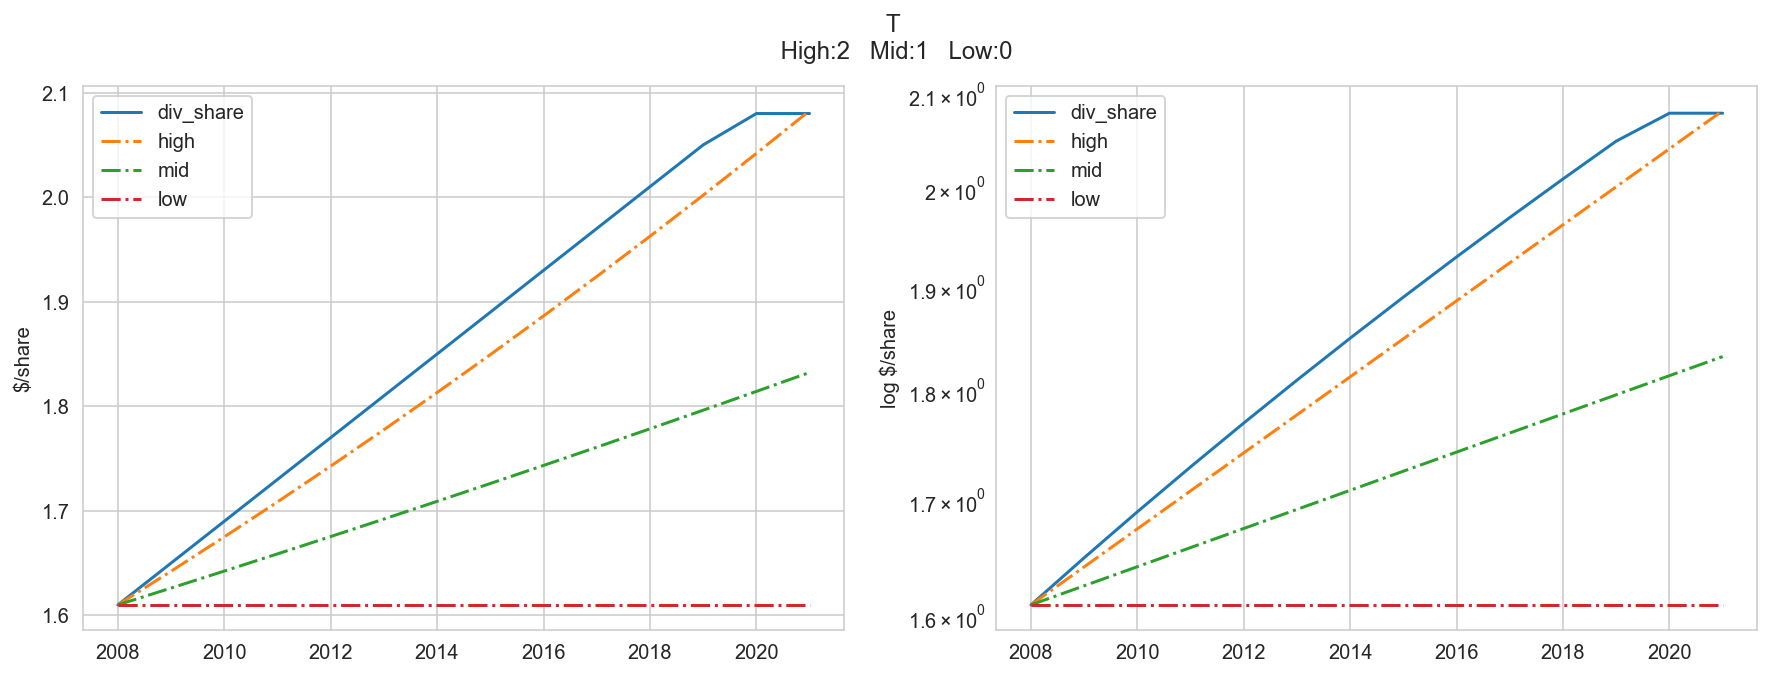

<IPython.core.display.Javascript object>

In [73]:
sensitivity_plot(
    company_data,
    "T",
    2,
    1,
    0,
    "div",
    start_at=2008,
)

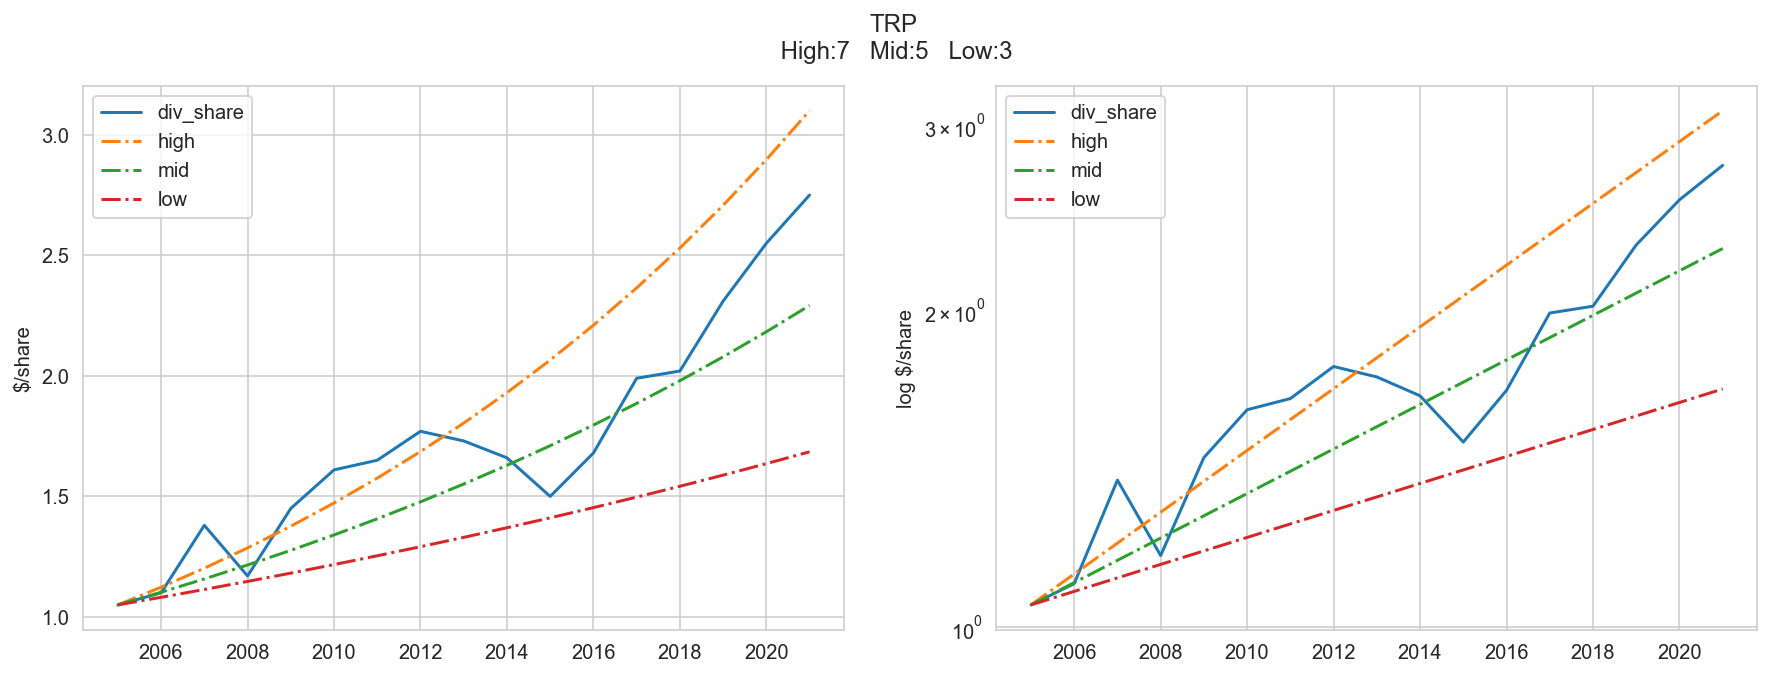

<IPython.core.display.Javascript object>

In [74]:
sensitivity_plot(company_data, "TRP", 7, 5, 3, "div")

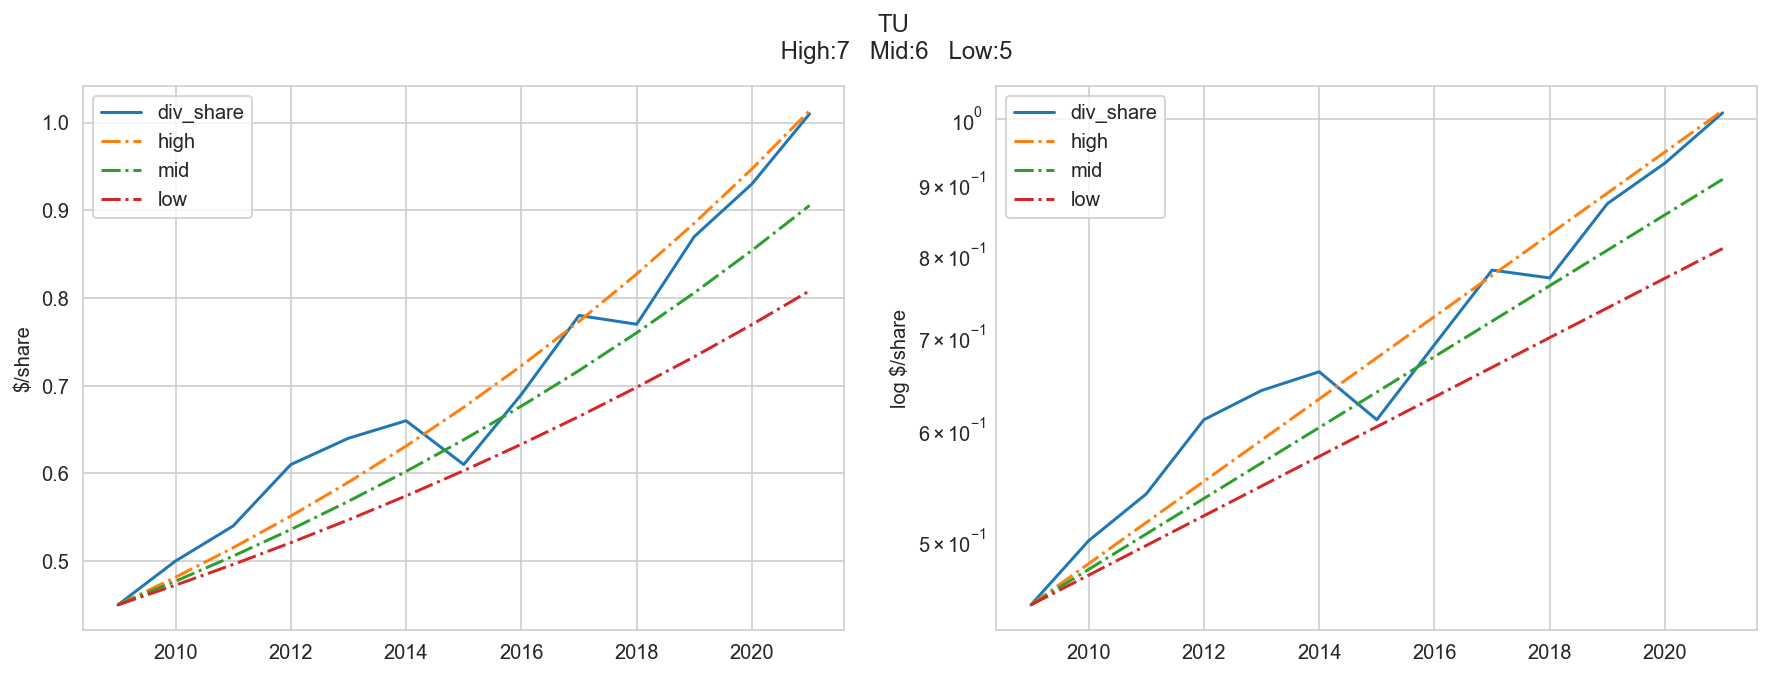

<IPython.core.display.Javascript object>

In [75]:
sensitivity_plot(
    company_data,
    "TU",
    7,
    6,
    5,
    "div",
    start_at=2009,
)

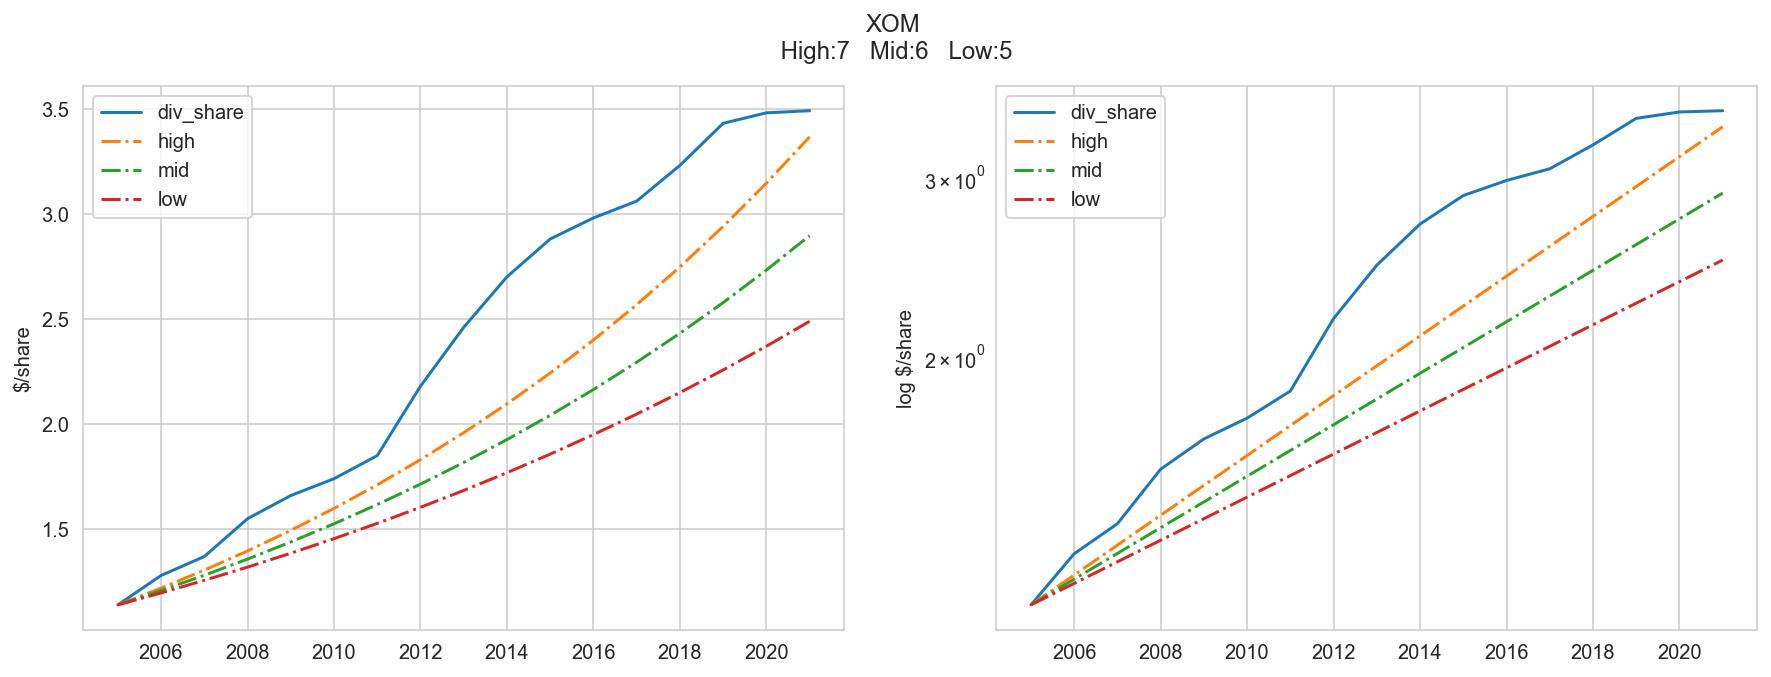

<IPython.core.display.Javascript object>

In [76]:
sensitivity_plot(company_data, "XOM", 7, 6, 5, "div")

### Starting Point Values

In [77]:
# Create a dictionary of starting values for each company
starting_dict = {}
for key, value in company_data.items():
    try:
        starting_dict[key] = value.loc[value.last_valid_index(), "div_share"]

    except:
        print(key)

<IPython.core.display.Javascript object>

In [78]:
# Transform the dictionary to a dataframe of start values
df_start = pd.DataFrame.from_dict(
    data=starting_dict, orient="index", columns=["start_value"]
)
df_out = df_start.reset_index().rename(columns={"index": "ticker"})

<IPython.core.display.Javascript object>

In [79]:
# View latest start values
df_out

,ticker,start_value
0,AAL.L,2.89
1,ALA.TO,0.76
2,AQN,0.61
3,AY,1.67
4,BEPC,1.23
5,BIPC,2.07
6,BK,1.30
7,BLK,16.52
8,BMO,3.43
9,BNS,2.91


<IPython.core.display.Javascript object>

In [80]:
# Override FCF values if needed
# ticker = 'AMZN'
# starting_dict[ticker] = 30 # Assumption: the FCF will jump back to trend prior to covid

# # Transform the dictionary to a dataframe of start values
# df_start = pd.DataFrame.from_dict(
#             data=starting_dict, orient="index", columns=["start_value"]
#         )
# df_out=df_start.reset_index().rename(columns={'index':'ticker'})

<IPython.core.display.Javascript object>

In [81]:
# Final check
df_out

,ticker,start_value
0,AAL.L,2.89
1,ALA.TO,0.76
2,AQN,0.61
3,AY,1.67
4,BEPC,1.23
5,BIPC,2.07
6,BK,1.30
7,BLK,16.52
8,BMO,3.43
9,BNS,2.91


<IPython.core.display.Javascript object>

In [82]:
# Export to disk
df_out.to_csv(processed_data / start_file, index=False)

<IPython.core.display.Javascript object>